In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Importing the dataset
df= pd.read_csv("/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv")
df

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
...,...,...,...,...,...,...,...
26047,26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316
26049,26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019
26050,26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174


In [64]:
# Get top 5 rows
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [65]:
# Check the size of the dataset
df.shape

(26052, 7)

In [66]:
uniqueCardTypes = df['Card Type'].unique()
uniqueExpTypes = df['Exp Type'].unique()
uniqueGenders = df['Gender'].unique()
print("Unique Card Types: ", uniqueCardTypes)
print("Unique Exp Types: ", uniqueExpTypes)
print("Unique Genders: ", uniqueGenders)

Unique Card Types:  ['Gold' 'Platinum' 'Silver' 'Signature']
Unique Exp Types:  ['Bills' 'Food' 'Entertainment' 'Grocery' 'Fuel' 'Travel']
Unique Genders:  ['F' 'M']


Column Names are:
* index - index
* City - The city in which the transaction took place
* Date - The date of the transaction
* Card Type - The type of credit card used for the transaction (Gold, Platinum, Silver, Signature)
* Exp Type - The type of expense associated with the transaction (Bills, Food, Entertainment, Grocery, Fuel, Travel)
* Gender - The gender of the cardholder (Male, Female)
* Amount - The amount of the transaction

In [67]:
# Check for null values
df.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

In [68]:
# Checking for duplicate
df.duplicated().sum()

0

There is no null values or duplicate values

In [69]:
df = df.drop('index', axis =1)
df.describe()


,Amount
count,26052.000000
mean,156411.537425
std,103063.254287
min,1005.000000
25%,77120.250000
50%,153106.500000
75%,228050.000000
max,998077.000000


## **Date Feature Engineering**

In [70]:
df["Date"] = pd.to_datetime(df["Date"], format='%d-%b-%y')
df["MonthName"] = df["Date"].dt.month_name()
df["DayName"] = df["Date"].dt.day_name()
df["Year"] = df["Date"].dt.year
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount,MonthName,DayName,Year
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,October,Wednesday,2014
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,August,Friday,2014
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,August,Wednesday,2014
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,April,Saturday,2014
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,May,Tuesday,2015


In [71]:
# Spliting City into City and Country and taking only City
df["City"]=df["City"].str.split(",",expand=True)[0]

In [72]:
df = df.drop(['Date'], axis=1)
df

,City,Card Type,Exp Type,Gender,Amount,MonthName,DayName,Year
0,Delhi,Gold,Bills,F,82475,October,Wednesday,2014
1,Greater Mumbai,Platinum,Bills,F,32555,August,Friday,2014
2,Bengaluru,Silver,Bills,F,101738,August,Wednesday,2014
3,Greater Mumbai,Signature,Bills,F,123424,April,Saturday,2014
4,Bengaluru,Gold,Bills,F,171574,May,Tuesday,2015
...,...,...,...,...,...,...,...,...
26047,Kolkata,Silver,Travel,F,128191,June,Sunday,2014
26048,Pune,Signature,Travel,M,246316,August,Sunday,2014
26049,Hyderabad,Silver,Travel,M,265019,January,Friday,2015
26050,Kanpur,Silver,Travel,M,88174,September,Sunday,2014


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Card Type  26052 non-null  object
 2   Exp Type   26052 non-null  object
 3   Gender     26052 non-null  object
 4   Amount     26052 non-null  int64 
 5   MonthName  26052 non-null  object
 6   DayName    26052 non-null  object
 7   Year       26052 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.6+ MB


In [74]:
df.head()

,City,Card Type,Exp Type,Gender,Amount,MonthName,DayName,Year
0,Delhi,Gold,Bills,F,82475,October,Wednesday,2014
1,Greater Mumbai,Platinum,Bills,F,32555,August,Friday,2014
2,Bengaluru,Silver,Bills,F,101738,August,Wednesday,2014
3,Greater Mumbai,Signature,Bills,F,123424,April,Saturday,2014
4,Bengaluru,Gold,Bills,F,171574,May,Tuesday,2015


## **EDA**

In [75]:
import seaborn as sns
import plotly.express as px

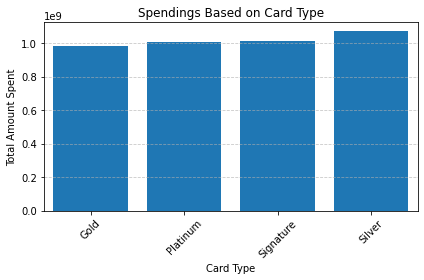

In [76]:
# Checking the usage based on card type 
groupedByCardType = df.groupby('Card Type')['Amount'].sum()
plt.figure(figsize=(6, 4))
groupedByCardType.plot(kind='bar', edgecolor='k')
plt.bar(groupedByCardType.index, groupedByCardType)
plt.xlabel('Card Type')
plt.ylabel('Total Amount Spent')
plt.title('Spendings Based on Card Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

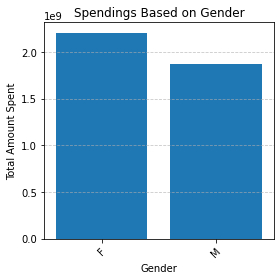

In [77]:
# Checking the usage based on gender
groupedByGender = df.groupby('Gender')['Amount'].sum()
plt.figure(figsize=(4, 4))
groupedByGender.plot(kind='bar', edgecolor='k')
plt.bar(groupedByGender.index, groupedByGender)
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')
plt.title('Spendings Based on Gender')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

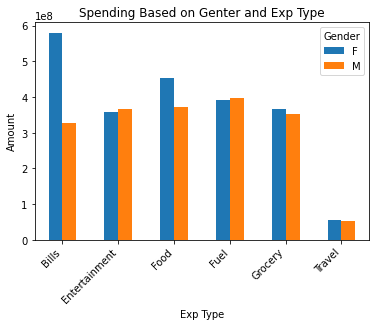

In [78]:
# Checking the spending based on gender and Exp Type
groupedData = df.groupby(['Exp Type', 'Gender'])['Amount'].sum().unstack()
groupedData.plot(kind='bar', stacked=False)
plt.xlabel('Exp Type')
plt.ylabel('Amount')
plt.title('Spending Based on Genter and Exp Type')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()


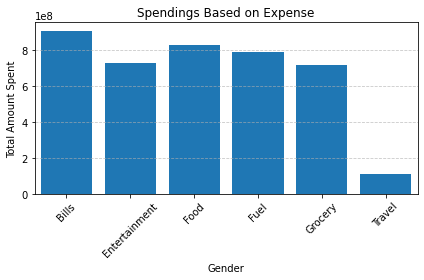

In [79]:
# Checking the usage based on Expense
groupedByGender = df.groupby('Exp Type')['Amount'].sum()
groupedByGender.plot(kind='bar', edgecolor='k')
plt.bar(groupedByGender.index, groupedByGender)
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')
plt.title('Spendings Based on Expense')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

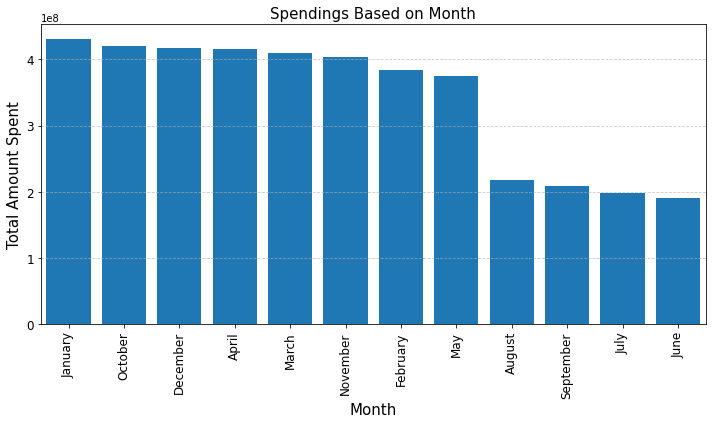

In [80]:
# Chekcking the spending based on months
groupedByMonth = df.groupby('MonthName')['Amount'].sum()
groupedByMonth = groupedByMonth.sort_values(ascending = False)
plt.figure(figsize=(10, 6))
groupedByMonth.plot(kind='bar', edgecolor='k')
plt.bar(groupedByMonth.index, groupedByMonth)
plt.xlabel('Month', fontsize = '15')
plt.ylabel('Total Amount Spent', fontsize = '15')
plt.title('Spendings Based on Month', fontsize = '15')
plt.xticks(rotation=90,fontsize='12')
plt.yticks(fontsize='12')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

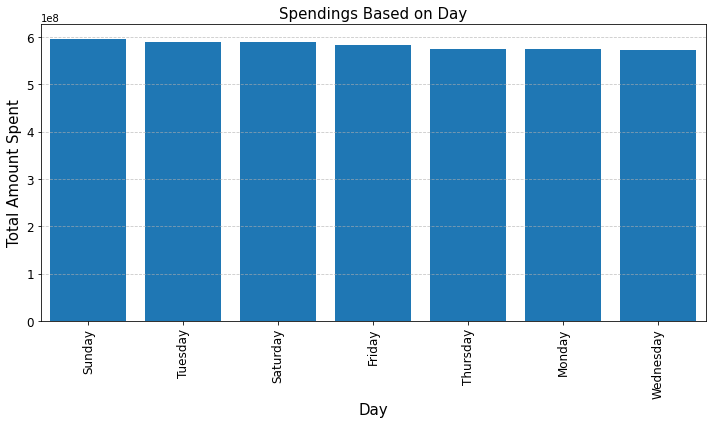

In [81]:
# Chekcking the spending based on days of the week
groupedByDay = df.groupby('DayName')['Amount'].sum()
groupedByDay = groupedByDay.sort_values(ascending = False)
plt.figure(figsize=(10, 6))
groupedByDay.plot(kind='bar', edgecolor='k')
plt.bar(groupedByDay.index, groupedByDay)
plt.xlabel('Day', fontsize = '15')
plt.ylabel('Total Amount Spent', fontsize = '15')
plt.title('Spendings Based on Day', fontsize = '15')
plt.xticks(rotation=90,fontsize='12')
plt.yticks(fontsize='12')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Index(['Greater Mumbai', 'Bengaluru', 'Ahmedabad', 'Delhi', 'Kolkata',
       'Lucknow', 'Chennai', 'Hyderabad', 'Surat', 'Kanpur'],
      dtype='object', name='City')
Total Cities 986


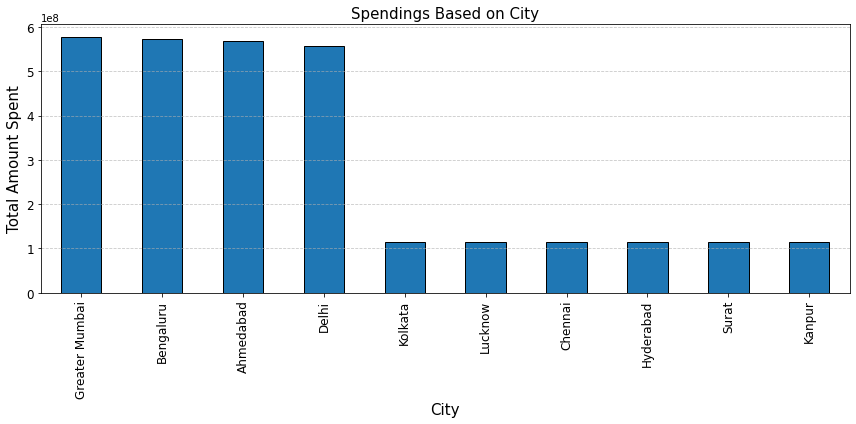

In [82]:
# Get the top 10 spending cities
topCities = df.groupby('City')['Amount'].sum().nlargest(10).index
print(topCities)
uniqueCities = df['City'].unique()
print("Total Cities", len(uniqueCities))
# Select only the top 10 cities
dataTopCities = df[df['City'].isin(topCities)]
groupedByCity = dataTopCities.groupby('City')['Amount'].sum()
groupedByCity = groupedByCity.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
groupedByCity.plot(kind='bar', edgecolor='k')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount Spent', fontsize=15)
plt.title('Spendings Based on City', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

(25754, 8)

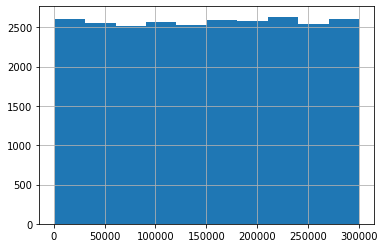

In [83]:
df = df[df['Amount'] < 300000]
df['Amount'].hist()
df.shape

In [84]:
df.shape

(25754, 8)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25754 entries, 0 to 26051
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       25754 non-null  object
 1   Card Type  25754 non-null  object
 2   Exp Type   25754 non-null  object
 3   Gender     25754 non-null  object
 4   Amount     25754 non-null  int64 
 5   MonthName  25754 non-null  object
 6   DayName    25754 non-null  object
 7   Year       25754 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.8+ MB


# Machine Learning

In [86]:
df.head()

,City,Card Type,Exp Type,Gender,Amount,MonthName,DayName,Year
0,Delhi,Gold,Bills,F,82475,October,Wednesday,2014
1,Greater Mumbai,Platinum,Bills,F,32555,August,Friday,2014
2,Bengaluru,Silver,Bills,F,101738,August,Wednesday,2014
3,Greater Mumbai,Signature,Bills,F,123424,April,Saturday,2014
4,Bengaluru,Gold,Bills,F,171574,May,Tuesday,2015


In [87]:
# one hot encode categorical variables
df = pd.get_dummies(df)

In [88]:
# Devide the data into X and Y
X = df.drop('Amount', axis=1) # Drop the Amount and Make the amount Response
y = np.array(df['Amount'])

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (25754, 1018)
y shape:  (25754,)


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training, validation, and testing sets
print("X size: ", len(X))
print("y size: ", len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train size: ", len(X_train))
print("y_train size: ", len(y_train))
print("X_test size: ", len(X_test))
print("y_test size: ", len(y_test))
print("test/Total :", len(X_test)/(len(X_train)+ len(X_test)))
# Training is 80% and Test is 20%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("X_train size: ", len(X_train))
print("y_train size: ", len(y_train))
print("X_val size: ", len(X_val))
print("y_val size: ", len(y_val))
print("Train/Total :", len(X_train)/(len(X)))
print("Val/Total :", len(X_val)/(len(X)))
# Training is 64% and validation is 16%

X size:  25754
y size:  25754
X_train size:  20603
y_train size:  20603
X_test size:  5151
y_test size:  5151
test/Total : 0.2000077657839559
X_train size:  16482
y_train size:  16482
X_val size:  4121
y_val size:  4121
Train/Total : 0.6399782558049235
Val/Total : 0.1600139784111206


In [90]:
scaler = StandardScaler()
scaler.fit(pd.DataFrame(y_train))
y_train = np.concatenate(scaler.transform(pd.DataFrame(y_train)), axis=0)
y_test = np.concatenate(scaler.transform(pd.DataFrame(y_test)), axis=0)
y_val = np.concatenate(scaler.transform(pd.DataFrame(y_val)), axis=0)

In [91]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [92]:
XGB_approx_hp={'max_depth':hp.quniform("max_depth", 4, 30, 1),
        'learning_rate':hp.uniform('learning_rate', 0.01, 0.2,0.1),
        'n_estimators':hp.quniform('n_estimators', 25, 100, 1),
        'objective':'reg:squarederror',
        'seed':42,
        'verbosity':0
    }

def XGB_par(space):
    model=xgb.XGBRegressor(
                    n_estimators =int(space['n_estimators']),
                    max_depth = int(space['max_depth']),
                    learning_rate=space['learning_rate'],
                    seed=space['seed'],
                    objective=space['objective'], 
                    verbosity=space['verbosity'], 
                    early_stopping_rounds=10)
    
    evaluation = [( X_train, y_train), ( X_val, y_val)]
    
    model.fit(X_train, y_train, eval_set=evaluation, verbose=False)

    y_pred = model.predict(X_val)

    mse = mean_squared_error(y_val,y_pred)

    return {'loss': mse, 'status': STATUS_OK }

In [93]:
trials = Trials()
print("XGB optimization:")
XGB_best_hyperparams = fmin(fn = XGB_par,
                        space = XGB_approx_hp,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)



XGB optimization:
100%|██████████| 100/100 [29:54<00:00, 17.95s/trial, best loss: 0.9967912687117153]


In [94]:
XGB_model = xgb.XGBRegressor(objective ='reg:squarederror'
                                 , learning_rate = XGB_best_hyperparams['learning_rate']
                                 , max_depth = int(XGB_best_hyperparams['max_depth'])
                                 , n_estimators = int(XGB_best_hyperparams['n_estimators'])
                                 , seed=42
                                 , verbosity=0)

model = XGB_model

In [95]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.07474224688059598, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=68, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=42, reg_alpha=0, reg_lambda=1, ...)

In [96]:
y_pred = model.predict(X_test)

In [98]:
r2_XGB = r2_score(y_test, y_pred)
print("R2 Score", r2_XGB)

R2 Score 0.0007165811703987446
